In [1]:
#
# a program to make .fsgd file for fREEsURFER-script fs_glm.sh from .xlsx files
#
import pandas as pd
import os
IMPACT_CWD=os.path.expanduser("~")+"/Downloads/impact/" # working directory
#print(IMPACT_CWD)
bl_book = pd.ExcelFile(IMPACT_CWD+'BHQ_Research_2018_01_Access用_20200108.xlsx') # base lien file
fu_book = pd.ExcelFile(IMPACT_CWD+'BHQ_Research_2018_02_Access用_20200108.xlsx') # follow up file

suffixlist=["_01","_02"]

# 手動で取り除くIDを指定
IDsQCfailed=["MR0011_0742","MR0011_0770","MR0011_0810"] # QCでNGのID
IDsQCfailed=IDsQCfailed+["MR0011_0761"] # follow up画像の無いID
# niftiファイルの無いIDは、spcファイルをmergeした時に自動で取り除かれるが、
# spcファイルを自動生成する場合はあらかじめ手動で取り除く必要がある
IDsQCfailed=IDsQCfailed+["MR0011_0681","MR0011_0787","MR0011_0793"] # niftiファイルの無いID
print("取り除くID:",IDsQCfailed)

取り除くID: ['MR0011_0742', 'MR0011_0770', 'MR0011_0810', 'MR0011_0761', 'MR0011_0681', 'MR0011_0787', 'MR0011_0793']


In [2]:
# read base line
bl_sheet_name = bl_book.sheet_names
bl_sheet_df = bl_book.parse(bl_sheet_name[0],skiprows=3,skipfooter=5)
bl_sheet_df=bl_sheet_df[bl_sheet_df[bl_sheet_df.columns[1]].str.contains("",na=False)] # id exists
#print("Sheet name:", bl_sheet_name[0])
bl_sheet_df=bl_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","Age_01","Gender_12_01","MRI_Imaging_Date_01",\
                               "FABHQ_01","FABHQ_DMN_01","FABHQ_CEN_01","FABHQ_SN_01",\
                               "GMBHQ_01","GMBHQ_DMN_01","GMBHQ_CEN_01","GMBHQ_SN_01",\
                               "SPA_Unrelated_SUM_01","TMT_PartA_01_01","TMT_PartB_01_01",\
                               "MMSEJ_SUM_01","CESD_Score_01"]] # only base lines have MMSE
#print(bl_sheet_df.shape)
#print(bl_sheet_df.tail(5))

# read follow up
fu_sheet_name = fu_book.sheet_names
fu_sheet_df=fu_book.parse(fu_sheet_name[0],skiprows=3,skipfooter=5)
fu_sheet_df=fu_sheet_df[fu_sheet_df[fu_sheet_df.columns[1]].str.contains("",na=False)] # id exists
#print("Sheet name:", fu_sheet_name[0])
fu_sheet_df=fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_02","Age_02","Gender_12_02","MRI_Imaging_Date_02",\
                               "FABHQ_02","FABHQ_DMN_02","FABHQ_CEN_02","FABHQ_SN_02",\
                               "GMBHQ_02","GMBHQ_DMN_02","GMBHQ_CEN_02","GMBHQ_SN_02",\
                               "SPA_Unrelated_SUM_01","TMT_PartA_01_02","TMT_PartB_01_02"]] #,"MMSEJ_SUM_01","CESD_Score_01"
#print(fu_sheet_df.shape)
#print(fu_sheet_df.tail(5))

# merge baseline and followup
bl_fu_sheet_df=pd.merge(bl_sheet_df, fu_sheet_df, left_on=bl_sheet_df.columns[0], right_on=fu_sheet_df.columns[0], how="inner", suffixes = ["_bl", "_fu"])
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace(" ","_")
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace("\n","_")

In [3]:
# remove IDs whose QC failed
bl_fu_sheet_df=bl_fu_sheet_df[~bl_fu_sheet_df["ImPACT_ID"].isin(IDsQCfailed)]

# for long_stats_slopes --qdec=long.qdec.table.dat
"""long_ageiqrestime_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","Age_01","Gender_12_01","MRI_Imaging_Date_01",\
                               "SPA_Unrelated_SUM_01_bl","TMT_PartA_01_01","TMT_PartB_01_01",\
                               "MMSEJ_SUM_01",\
                                          "Age_02","MRI_Imaging_Date_02",\
                               "SPA_Unrelated_SUM_01_fu","TMT_PartA_01_02","TMT_PartB_01_02"]]
"""
"""
                               "FABHQ_01","FABHQ_DMN_01","FABHQ_CEN_01","FABHQ_SN_01",\
                               "GMBHQ_01","GMBHQ_DMN_01","GMBHQ_CEN_01","GMBHQ_SN_01",\
                               "FABHQ_02","FABHQ_DMN_02","FABHQ_CEN_02","FABHQ_SN_02",\
                               "GMBHQ_02","GMBHQ_DMN_02","GMBHQ_CEN_02","GMBHQ_SN_02",\
"""
#print(bl_fu_sheet_df.shape)
long_qdec_table_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","MRI_Imaging_Date_01","MRI_Imaging_Date_02"]]
long_qdec_table_df["fid"]="V_"+long_qdec_table_df["ImPACT_ID"]+"_"+long_qdec_table_df["Arm_Type_01"]
long_qdec_table_df["delay"]=(long_qdec_table_df["MRI_Imaging_Date_02"]-long_qdec_table_df["MRI_Imaging_Date_01"]).dt.days
long_qdec_table_df["years"]=long_qdec_table_df["delay"]/365
#long_qdec_table_df.to_csv(IMPACT_CWD+"long_qdec_table_df.csv")

filename=IMPACT_CWD+"long.qdec.table.dat"
outfile=open(filename, "wt")
"""
fsid	fsid-base	years	Group	Delay
V_MR0011_0653_AR_01	V_MR0011_0653_AR	0.0	Main	0
V_MR0011_0653_AR_02	V_MR0011_0653_AR	0.0821917808219178	Main	30
"""
sl=["fsid","fsid-base","years","Group","Delay"]
outfile.write(" ".join(sl)+"\n")
for temp_line in long_qdec_table_df.itertuples():
    temp_fid=str(temp_line[long_qdec_table_df.columns.get_loc("fid")+1]) # +1 for .index
    temp_delay=str(temp_line[long_qdec_table_df.columns.get_loc("delay")+1]) # +1 for .index
    temp_years=str(temp_line[long_qdec_table_df.columns.get_loc("years")+1]) # +1 for .index
    sl=[temp_fid+suffixlist[0],temp_fid,str(0),"Main",str(0)]
    outfile.write(" ".join(sl)+"\n")
    sl=[temp_fid+suffixlist[1],temp_fid,str(temp_years),"Main",str(temp_delay)]
    outfile.write(" ".join(sl)+"\n")
outfile.close()

grp_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01"]]
grp_df["fid"]="V_"+grp_df["ImPACT_ID"]+"_"+grp_df["Arm_Type_01"]+"_01"
grp_df["group"]=0
grp_df.loc[(grp_df["Arm_Type_01"]=="AR"),"group"]=1
grp_df.loc[(grp_df["Arm_Type_01"]=="AS"),"group"]=2
grp_df.loc[(grp_df["Arm_Type_01"]=="AT"),"group"]=3
grp_df.loc[(grp_df["Arm_Type_01"]=="AU"),"group"]=4
#print(grp_df)

grp_df.to_csv(IMPACT_CWD+"grp_df.csv")

In [4]:
# !!! first time this cell does not work !!!
# please run long_stats_slopes to make xh.thick.spc.csv from grp_df.csv
"""
cmd="mkdir "+IMPACT_CWD+"tables"
print(cmd)
os.system(cmd)
cmd="long_mris_slopes --qdec \""+IMPACT_CWD+"long.qdec.table.dat\" --meas thickness --hemi lh --do-avg --do-rate --do-pc1 --do-spc --do-stack --do-label --time years --qcache fsaverage --sd $SUBJECTS_DIR"
print(cmd)
os.system(cmd)
cmd="long_mris_slopes --qdec \""+IMPACT_CWD+"long.qdec.table.dat\" --meas thickness --hemi rh --do-avg --do-rate --do-pc1 --do-spc --do-stack --do-label --time years --qcache fsaverage --sd $SUBJECTS_DIR"
print(cmd)
os.system(cmd)
"""
#cmd="long_stats_slopes --qdec=\""+IMPACT_CWD+"long.qdec.table.dat\" --stats=lh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-avg --do-rate --do-pc1 --do-spc"
cmd="long_stats_slopes --qdec=\""+IMPACT_CWD+"long.qdec.table.dat\" --stats=lh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-spc --stack-spc=\""+IMPACT_CWD+"tables/lh.thick.spc.csv\""
print(cmd)
os.system(cmd)
#cmd="long_stats_slopes --qdec=\""+IMPACT_CWD+"long.qdec.table.dat\" --stats=rh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-avg --do-rate --do-pc1 --do-spc"
cmd="long_stats_slopes --qdec=\""+IMPACT_CWD+"long.qdec.table.dat\" --stats=rh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-spc --stack-spc=\""+IMPACT_CWD+"tables/rh.thick.spc.csv\""
print(cmd)
os.system(cmd)
result_lh_df = pd.read_table(IMPACT_CWD+"tables/lh.thick.spc.csv", delim_whitespace=True)
result_rh_df = pd.read_table(IMPACT_CWD+"tables/rh.thick.spc.csv", delim_whitespace=True)

#print(result_lh_df.head(5))
#print(result_rh_df.head(5))
spc_bilateral_df=pd.merge(result_lh_df, result_rh_df, left_on=result_lh_df.columns[0], right_on=result_rh_df.columns[0], how="inner", suffixes = ["_lh", "_rh"])

print(spc_bilateral_df.shape)

long_stats_slopes --qdec="/home/s1613134/Downloads/impact/long.qdec.table.dat" --stats=lh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-avg --do-rate --do-pc1 --do-spc
long_stats_slopes --qdec="/home/s1613134/Downloads/impact/long.qdec.table.dat" --stats=rh.aparc.stats --meas=thickness --sd=$SUBJECTS_DIR --do-avg --do-rate --do-pc1 --do-spc
(158, 75)


In [5]:
# remove IDs depressed
#print("IDs depressed:\n",bl_fu_sheet_df[bl_fu_sheet_df["CESD_Score_01"]>=16][["ImPACT_ID","Arm_Type_01","CESD_Score_01"]])
bl_fu_sheet_df=bl_fu_sheet_df[bl_fu_sheet_df["CESD_Score_01"]<16]

# make data frame
bl_fu_sheet_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","Age_01","Gender_12_01","MRI_Imaging_Date_01",\
                               "SPA_Unrelated_SUM_01_bl","TMT_PartA_01_01","TMT_PartB_01_01",\
                               "MMSEJ_SUM_01",\
                                          "Age_02","MRI_Imaging_Date_02",\
                               "SPA_Unrelated_SUM_01_fu","TMT_PartA_01_02","TMT_PartB_01_02"]]
bl_fu_sheet_df["fID"]="V_"+bl_fu_sheet_df["ImPACT_ID"]+"_"+bl_fu_sheet_df["Arm_Type_01"]
#print(df_result.shape)
#print(df_result.head(2))
#print(type(df_result))

# merge spc 
df_result=pd.merge(bl_fu_sheet_df, spc_bilateral_df, \
                   left_on="fID", right_on=spc_bilateral_df.columns[0], how="inner").sort_values(by=bl_fu_sheet_df.columns[0])
#print(df_result.shape)
#print(df_result.head(2))
#print(type(df_result))

df_result=df_result.drop(columns=["Age_02"]) # work around for coincidence
df_result=df_result.set_index("fID",drop=False)
#df_result=df_result.T.drop_duplicates().T # 重複列削除
"""
 somehow ".T" causes the following error in 
    model=ols(df_result_FUNC.columns[ii]+' ~ is_CTRL + is_INTRV + Age_01', ftest_A).fit()
 work around is
    df_result.to_csv('temp.csv')
    df_result=pd.read_csv('temp.csv')

~/.local/lib/python3.6/site-packages/statsmodels/base/model.py in from_formula(cls, formula, data, subset, drop_cols, *args, **kwargs)
    175                              'columns that has shape {0}. This occurs when '
    176                              'the variable converted to endog is non-numeric'
--> 177                              ' (e.g., bool or str).'.format(endog.shape))
    178         if drop_cols is not None and len(drop_cols) > 0:
    179             cols = [x for x in exog.columns if x not in drop_cols]

ValueError: endog has evaluated to an array with multiple columns that has shape (71, 71). 
This occurs when the variable converted to endog is non-numeric (e.g., bool or str).
"""
df_result=df_result.drop(columns=["MRI_Imaging_Date_01", "MRI_Imaging_Date_02"])
print(df_result.shape)
#print(df_result.head(2))
print(type(df_result))

(134, 87)
<class 'pandas.core.frame.DataFrame'>


AS: application
                                 spc      pval
65     rh_superiortemporal_thickness  0.041632
69   rh_transversetemporal_thickness  0.047835
59           rh_precentral_thickness  0.051491
2   lh_caudalmiddlefrontal_thickness  0.059128
66        rh_supramarginal_thickness  0.062781

AT: rose
                                 spc      pval
57          rh_postcentral_thickness  0.052026
45     rh_isthmuscingulate_thickness  0.125969
49  rh_medialorbitofrontal_thickness  0.162860
59           rh_precentral_thickness  0.173490
36                           eTIV_lh  0.213121

AU: collagen
                                  spc      pval
33                lh_insula_thickness  0.011603
56         rh_pericalcarine_thickness  0.030454
25  lh_rostralmiddlefrontal_thickness  0.047765
15           lh_paracentral_thickness  0.084618
63       rh_superiorfrontal_thickness  0.094412


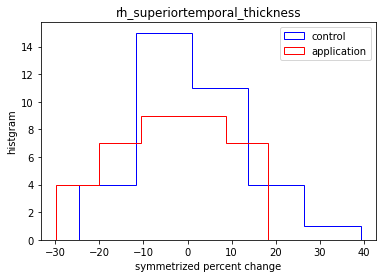

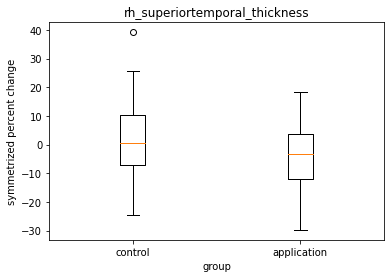

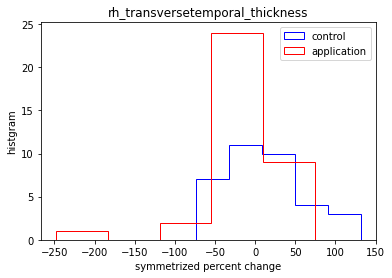

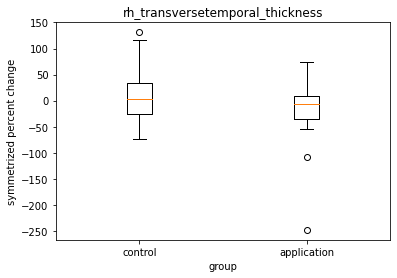

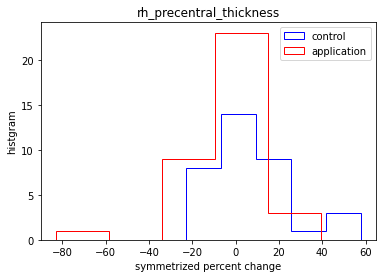

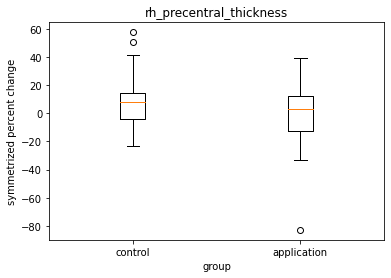

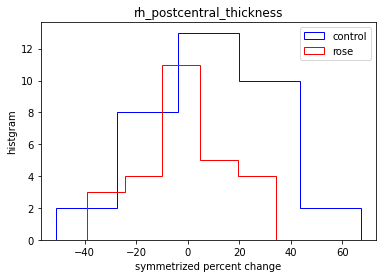

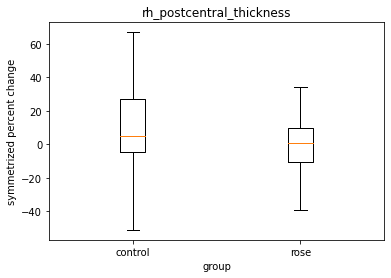

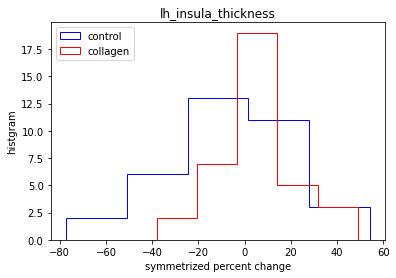

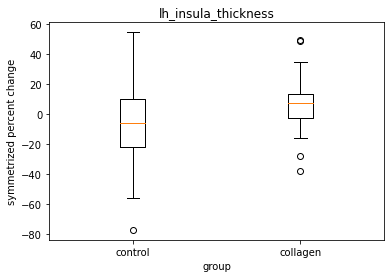

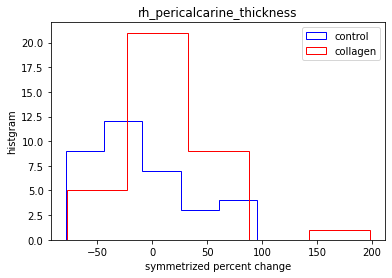

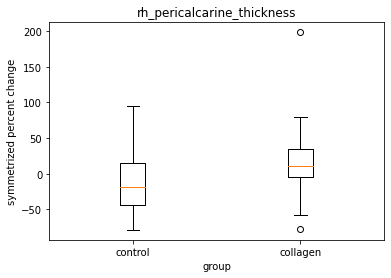

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

temp_Xlabel="symmetrized percent change"
temp_Ylabel="histgram"

def ttest_and_plot(arg1_ctrl, arg2_intrv, arg3_intrvname, df_result_arg4, arg5_figurenum):
    ttest_result_df_FUNC = pd.DataFrame(index=[], columns=['spc', 'pval'])
    for ii in range(df_result_arg4.columns.get_loc('lh_bankssts_thickness'),df_result_arg4.columns.get_loc('rh_MeanThickness_thickness')+1):
        ttest_A=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg1_ctrl),df_result_arg4.columns[ii]]
        ttest_B=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg2_intrv),df_result_arg4.columns[ii]]
        ttest_result=stats.ttest_ind(ttest_A,ttest_B)
        ttest_result_df_FUNC=\
        ttest_result_df_FUNC.append(pd.DataFrame([[df_result.columns[ii],ttest_result.pvalue]], columns=ttest_result_df_FUNC.columns),ignore_index=True)

    ttest_result_df_sorted=ttest_result_df_FUNC.sort_values('pval')
    print(ttest_result_df_sorted.head(5))

    for jj in range(arg5_figurenum):
        minspcname=ttest_result_df_sorted['spc'].reset_index(drop=True)[jj]
        ttest_A=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg1_ctrl),minspcname]
        ttest_B=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg2_intrv),minspcname]
        plt.figure()
        plt.hist(ttest_A, bins=5, histtype="step", color="b", label="control")
        plt.hist(ttest_B, bins=5, histtype="step", color="r", label=arg3_intrvname)
        plt.title(minspcname)
        plt.xlabel(temp_Xlabel)
        plt.ylabel(temp_Ylabel)
        plt.legend()
        plt.savefig(IMPACT_CWD+"figure_"+arg2_intrv+"_"+str(jj+1)+".png")
        #plt.clf()
        fig,ax=plt.subplots()
        ax.boxplot([ttest_A,ttest_B],labels=["control",arg3_intrvname])
        plt.title(minspcname)
        plt.ylabel("symmetrized percent change")
        plt.xlabel("group")
        plt.savefig(IMPACT_CWD+"t_box_figure_"+arg2_intrv+"_"+str(jj+1)+".png")
        
    return

print("AS: application")
ttest_and_plot("AR", "AS", "application", df_result, 3)

print("")
print("AT: rose")
ttest_and_plot("AR", "AT", "rose", df_result, 1)

print("")
print("AU: collagen")
ttest_and_plot("AR", "AU", "collagen", df_result, 2)

AS: application
                                spc                  pval
69  rh_transversetemporal_thickness   0.03994380275266272
59          rh_precentral_thickness   0.04140305353063925
65    rh_superiortemporal_thickness   0.04386477276912116
57         rh_postcentral_thickness  0.055392713431004444
66       rh_supramarginal_thickness   0.05803745622446373

AT: rose
                                      spc                 pval
57               rh_postcentral_thickness  0.06255572950228915
45          rh_isthmuscingulate_thickness   0.1114056218736181
49       rh_medialorbitofrontal_thickness  0.17268079252117338
59                rh_precentral_thickness  0.18642112945886774
24  lh_rostralanteriorcingulate_thickness  0.22150123994906762

AU: collagen
                                  spc                  pval
33                lh_insula_thickness   0.01751660090378523
56         rh_pericalcarine_thickness  0.049584342265522025
25  lh_rostralmiddlefrontal_thickness   0.062106714546

<Figure size 432x288 with 0 Axes>

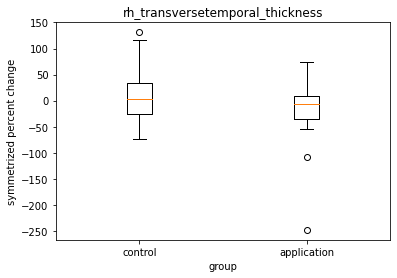

<Figure size 432x288 with 0 Axes>

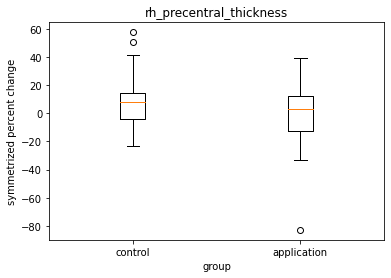

<Figure size 432x288 with 0 Axes>

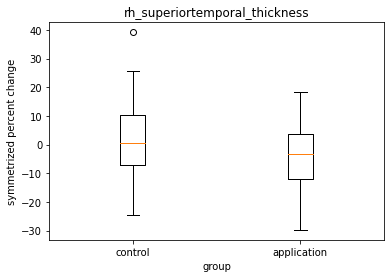

<Figure size 432x288 with 0 Axes>

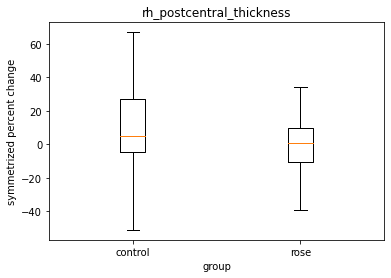

<Figure size 432x288 with 0 Axes>

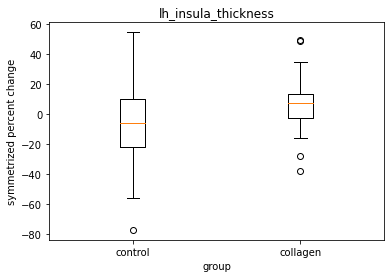

<Figure size 432x288 with 0 Axes>

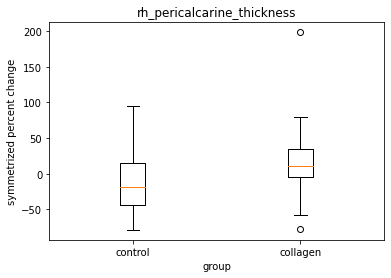

In [7]:
from statsmodels.formula.api import ols
import copy

def ftest_covar_age(arg1_ctrl, arg2_intrv, df_result_arg3,arg3_intrvname, arg5_figurenum):
    df_result_FUNC=copy.copy(df_result_arg3[df_result_arg3["Arm_Type_01"].isin([arg1_ctrl, arg2_intrv])])
    df_result_FUNC["is_CTRL"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg1_ctrl),"is_CTRL"] = 1
    df_result_FUNC["is_INTRV"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg2_intrv),"is_INTRV"] = 1

    ftest_result_df_FUNC = pd.DataFrame(index=[], columns=['spc', 'pval'])
    for ii in range(df_result_FUNC.columns.get_loc('lh_bankssts_thickness'),df_result_FUNC.columns.get_loc('rh_MeanThickness_thickness')+1):
        ftest_A=df_result_FUNC.loc[:,['Age_01',"is_CTRL","is_INTRV",df_result_FUNC.columns[ii]]]
        #print(ftest_A.head())
        model=ols(df_result_FUNC.columns[ii]+' ~ is_CTRL + is_INTRV + Age_01', ftest_A).fit()
        #print(model.summary())
        ftest_result=model.f_test([0, 1, -1, 0])
        ftest_result_df_FUNC=\
        ftest_result_df_FUNC.append(pd.DataFrame([[df_result_FUNC.columns[ii],ftest_result.pvalue]], \
                                               columns=ftest_result_df_FUNC.columns),ignore_index=True)

    df_result_arg4=df_result_FUNC
    ftest_result_df_sorted=ftest_result_df_FUNC.sort_values('pval')
    for jj in range(arg5_figurenum):
        minspcname=ftest_result_df_sorted['spc'].reset_index(drop=True)[jj]
        ftest_A=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg1_ctrl),minspcname]
        ftest_B=df_result_arg4.loc[(df_result_arg4["Arm_Type_01"]==arg2_intrv),minspcname]
        plt.figure()
        #plt.clf()
        fig,ax=plt.subplots()
        ax.boxplot([ftest_A,ftest_B],labels=["control",arg3_intrvname])
        plt.title(minspcname)
        plt.ylabel("symmetrized percent change")
        plt.xlabel("group")
        plt.savefig(IMPACT_CWD+"f_box_figure_"+arg2_intrv+"_"+str(jj+1)+".png")

    return ftest_result_df_sorted

print("AS: application")
ftest_result_df1_AS_sorted=ftest_covar_age("AR", "AS", df_result, "application",3)
print(ftest_result_df1_AS_sorted.head(5))

print("")
print("AT: rose")
ftest_result_df1_AT_sorted=ftest_covar_age("AR", "AT", df_result, "rose",1)
print(ftest_result_df1_AT_sorted.head(5))

print("")
print("AU: collagen")
ftest_result_df1_AU_sorted=ftest_covar_age("AR", "AU", df_result, "collagen",2)
print(ftest_result_df1_AU_sorted.head(5))

AS: application
                                  spc                 pval
42              rh_fusiform_thickness  0.02728325981299383
62  rh_rostralmiddlefrontal_thickness  0.03586935639092355
12   lh_medialorbitofrontal_thickness  0.03680397973915914
10  lh_lateralorbitofrontal_thickness   0.0630320113220731
54         rh_parsorbitalis_thickness  0.10713069490393291

AT: rose
                                  spc                 pval
46      rh_lateraloccipital_thickness  0.06168183969637898
15           lh_paracentral_thickness  0.16395743829716877
10  lh_lateralorbitofrontal_thickness  0.16594712290271044
28      lh_superiortemporal_thickness  0.19264748795535838
39   rh_caudalmiddlefrontal_thickness  0.22033376671408827

AU: collagen
                                  spc                  pval
62  rh_rostralmiddlefrontal_thickness  0.004746047764172065
10  lh_lateralorbitofrontal_thickness  0.008611182136925685
52           rh_paracentral_thickness  0.016898792523697678
46      rh_l

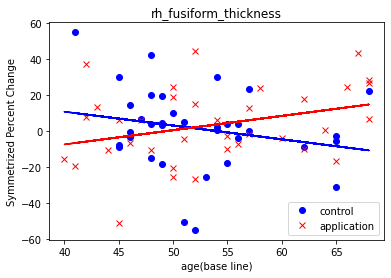

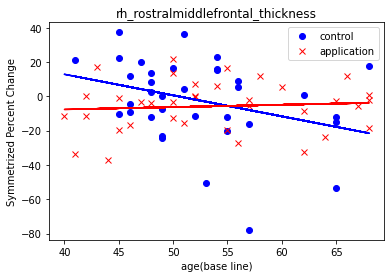

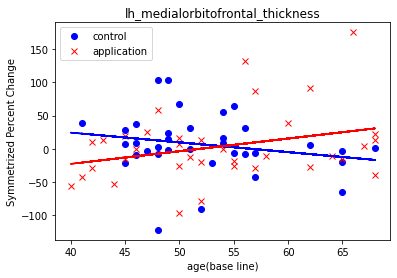

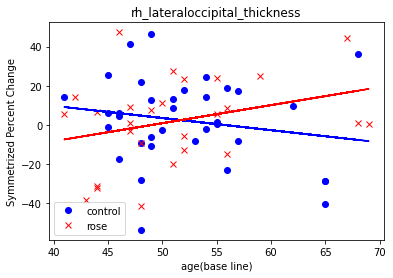

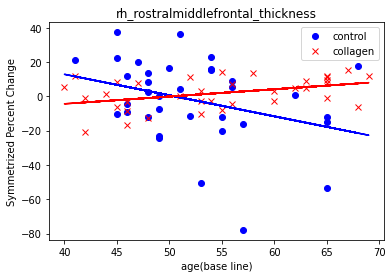

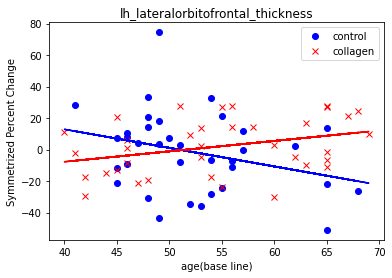

In [8]:
# different slope
temp_Xlabel="age(base line)"
temp_Ylabel="Symmetrized Percent Change"

def plot_dods(arg1_ctrl, arg2_intrv, arg3_intrvname, df_result_ARG4, ftest_result_sorted_ARG5, figure_num):
    for jj in range(figure_num):
        minspcname=ftest_result_sorted_ARG5['spc'].reset_index(drop=True)[jj]
        ftest_A=df_result_ARG4.loc[:,['age_CTRL','age_INTRV',"is_CTRL","is_INTRV",minspcname]]#df_result_ARG4.columns[ii]]]
        model=ols(minspcname+' ~ is_CTRL + is_INTRV + age_CTRL + age_INTRV', ftest_A).fit()
        #minspcname=minspcname[:-2] # remove suffix
        """print("")
        print(minspcname)
        print(model.summary())"""
        # plot
        plot_ctrl=df_result_ARG4.loc[(df_result["Arm_Type_01"]==arg1_ctrl),['Age_01',minspcname]]
        plot_intrv=df_result_ARG4.loc[(df_result["Arm_Type_01"]==arg2_intrv),['Age_01',minspcname]]
        plt.figure()
        plt.plot(plot_ctrl['Age_01'],plot_ctrl[minspcname], color="b", label="control",marker="o", linestyle='None')
        plt.plot(plot_intrv['Age_01'],plot_intrv[minspcname], color="r", label=arg3_intrvname,marker="x", linestyle='None')
        # line
        plt.plot(df_result_ARG4['Age_01'],\
                 model.params["Intercept"]+model.params["is_CTRL"]+df_result_ARG4['Age_01']*model.params["age_CTRL"], color="b")
        plt.plot(df_result_ARG4['Age_01'],\
                 model.params["Intercept"]+model.params["is_INTRV"]+df_result_ARG4['Age_01']*model.params["age_INTRV"], color="r")
        # style
        plt.title(minspcname)
        plt.ylabel(temp_Ylabel)
        plt.xlabel(temp_Xlabel)
        plt.legend()
        # save figure
        plt.savefig(IMPACT_CWD+"dods_corr_figure_"+arg2_intrv+"_"+str(jj+1)+".png")
        #plt.clf() # show no figure
    return

def calc_dods(arg1_ctrl, arg2_intrv, df_result_arg3):
    df_result_FUNC=copy.copy(df_result_arg3[df_result_arg3["Arm_Type_01"].isin([arg1_ctrl, arg2_intrv])])
    df_result_FUNC["is_CTRL"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg1_ctrl),"is_CTRL"] = 1
    df_result_FUNC["is_INTRV"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg2_intrv),"is_INTRV"] = 1
    df_result_FUNC["age_CTRL"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg1_ctrl),"age_CTRL"] = df_result_FUNC["Age_01"]
    df_result_FUNC["age_INTRV"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg2_intrv),"age_INTRV"] = df_result_FUNC["Age_01"]
    
    ftest_result_df2_FUNC = pd.DataFrame(index=[], columns=['spc', 'pval'])
    for ii in range(df_result_FUNC.columns.get_loc('lh_bankssts_thickness'),df_result_FUNC.columns.get_loc('rh_MeanThickness_thickness')+1):
        ftest_A=df_result_FUNC.loc[:,['age_CTRL','age_INTRV',"is_CTRL","is_INTRV",df_result_FUNC.columns[ii]]]
        model=ols(df_result_FUNC.columns[ii]+' ~ is_CTRL + is_INTRV + age_CTRL + age_INTRV', ftest_A).fit()
        #ftest_result=model.f_test([0, 0, 0, 1, -1])
        ftest_result=model.f_test([0, 0, 0, -1, 1])
        ftest_result_df2_FUNC=\
        ftest_result_df2_FUNC.append(pd.DataFrame([[df_result_FUNC.columns[ii],ftest_result.pvalue]], columns=ftest_result_df2_FUNC.columns),ignore_index=True)
    return df_result_FUNC,ftest_result_df2_FUNC.sort_values('pval')

print("AS: application")
df_result_AS,ftest_result_df2_AS_sorted=calc_dods("AR", "AS", df_result)
print(ftest_result_df2_AS_sorted.head(5))
print("")

print("AT: rose")
df_result_AT,ftest_result_df2_AT_sorted=calc_dods("AR", "AT", df_result)
print(ftest_result_df2_AT_sorted.head(5))
print("")

print("AU: collagen")
df_result_AU,ftest_result_df2_AU_sorted=calc_dods("AR", "AU", df_result)
print(ftest_result_df2_AU_sorted.head(5))
print("")

# figure
# correlation
plot_dods("AR", "AS", "application", df_result_AS, ftest_result_df2_AS_sorted, 3)
plot_dods("AR", "AT", "rose", df_result_AT, ftest_result_df2_AT_sorted, 1)
plot_dods("AR", "AU", "collagen", df_result_AU, ftest_result_df2_AU_sorted, 2)

In [9]:
# calc correlation coeff.
corr_matp = df_result.corr(method='pearson')
corr_matp=corr_matp.dropna(how = 'all')
corr_matp=corr_matp.dropna(axis = 'columns')
corr_matp.to_csv(IMPACT_CWD+'spc_corr_matp.csv')

for ss in ["AR","AS","AT","AU"]:
    df_result_TEMP=copy.copy(df_result[df_result["Arm_Type_01"]==ss])
    #print(ss,df_result_TEMP.head(2))
    corr_matp = df_result_TEMP.corr(method='pearson')
    corr_matp=corr_matp.dropna(how = 'all')
    corr_matp=corr_matp.dropna(axis = 'columns')
    corr_matp.to_csv(IMPACT_CWD+"spc_corr_matp_"+ss+".csv")

In [10]:
"""import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matp,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_matp.columns.values,
            yticklabels=corr_matp.columns.values
           )
plt.show()
#fig = plt.figure(figsize=(10,10),dpi=200)
#fig.show()"""

"import seaborn as sns\nimport matplotlib.pyplot as plt\nsns.heatmap(corr_matp,square=True,\n            vmin=-1.0,\n            vmax=1.0,\n            center=0,\n            annot=False, # True:格子の中に値を表示\n#            fmt='.1f',\n            xticklabels=corr_matp.columns.values,\n            yticklabels=corr_matp.columns.values\n           )\nplt.show()\n#fig = plt.figure(figsize=(10,10),dpi=200)\n#fig.show()"

In [11]:
"""corr_mats = df_result.corr(method='spearman')
corr_mats=corr_mats.dropna(how = 'all')
corr_mats=corr_mats.dropna(axis = 'columns')
corr_mats.to_csv(IMPACT_CWD+'spc_corr_mats.csv')
sns.heatmap(corr_mats,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_mats.columns.values,
            yticklabels=corr_mats.columns.values
           )
plt.show()"""

"corr_mats = df_result.corr(method='spearman')\ncorr_mats=corr_mats.dropna(how = 'all')\ncorr_mats=corr_mats.dropna(axis = 'columns')\ncorr_mats.to_csv(IMPACT_CWD+'spc_corr_mats.csv')\nsns.heatmap(corr_mats,square=True,\n            vmin=-1.0,\n            vmax=1.0,\n            center=0,\n            annot=False, # True:格子の中に値を表示\n#            fmt='.1f',\n            xticklabels=corr_mats.columns.values,\n            yticklabels=corr_mats.columns.values\n           )\nplt.show()"

In [12]:
#print(corr_matp)

In [13]:
#print(corr_mats)